# Практическая работа №3: Статистический анализ социальных сетей.
Выполнил студент гр. 0383 Бояркин Никита. Вариант №51

## Цель работы
Овладеть навыками работы с математическими пакетами для статистического анализа социальных сетей.

## Основные теоретические положения
**Диада** $-$ элемент сети, представляющий собой пару акторов и связь между ними, либо её отсутствие 

$D_{ij}=(X_{ij}, X_{ji}), i\neq j$.

**Цензус диад** — тройка чисел <M, A, N>, где:

$M = \sum_{i<j} X_{ij} X_{ji}$

$A = X_{++} - 2M$

$N = (^2_g) - A - M$

**Индекс взаимности Каца-Пауэлла** — характеристика измерения тенденции акторов в группе:

$-\infty < \rho_{кр} \leqslant 1$.

Индекс взаимности основан на ожидании кол-ва взаимн. диад, предполагая, что выбор делается акторами случайным образом.

Вероятность взаимного выбора между любой произвольной парой акторов равна $d^2/(g-1)^2$

Вероятность того, что общая диада является взаимной:

$p(i -> j ∩ j -> i) = \frac{d}{(g-1)}(\frac{d}{(g-1)} + p_{kp}\frac{g-1-d}{g-1})$

Оценка при свободном выборе $p_{ekp}$ = $\frac{2(g-1)M - gd^2}{gd(g-1-d)}$

Оценка при фиксированном выборе 

$p_{ekpfix} = \frac{2(g-1)^2M-L^2+L_2}{L(g-1)^2 -L^2 +L_2}$

**Индекс взаимности Бандиопадхьяйя** — индекс, основанный на максимальной и минимальной значениях количества диад в сети. 

$\rho_B = \displaystyle{\frac{M - M_{\min}}{M_{\max} - M_{\min}}}.$

$M_{\min} = \max f(t)$, $0\leqslant t \leqslant g$

**Нулевые гипотезы**

$H_0: L \sim B(g(g-1), \frac{1}{2})$

$z_l = \frac{l - g(g-1)/2}{\sqrt{g(g-1)/4}}$ 

$H_0 : L \sim B(g(g-1), P_0)$

$z_l = \frac{l - g(g-1)P_0}{\sqrt{g(g-1)P_0(1-P_0)}}$

## Постановка задачи
С помощью математических пакетов и соответствующих библиотек провести статистический анализ случайно смоделированного ориентированного графа. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы

In [26]:
# Подключаем необходимые библиотеки
if(!require('igraph')) {
        install.packages('igraph')
        library('igraph')
        
    }
if(!require('statnet')){
        install.packages('statnet')
        library('statnet')
}
if(!require('sna')){
        install.packages('sna')
        library('sna')
}

1. С помощью библиотеки igraph смоделировать случайный орграф
G𝑑 на основе модели Эрдеша—Реньи: G𝑑 = G (𝑔, 𝑝), где 𝑔 – количество акторов, 𝑝 – вероятность появления дуги между акторами. В R
для модели случайного графа Эрдеша—Реньи существует функция
erdos.renyi.game(). Ознакомьтесь с данной моделью и опишите
её.

Вариант 51:
* ${g}$ = 80
* ${p}$ = 0.62
* ${P_0}$ = 0.61
* ${\alpha}$ = 0.04 

In [2]:
# Переменные:
g <- 80
p <- 0.62
P.zero <- 0.61
alpha <- 0.04

In [9]:
graph <- igraph::erdos.renyi.game(n = g, p.or.m = p, type = "gnp", directed = TRUE)
graph

IGRAPH 849e01a D--- 80 3911 -- Erdos-Renyi (gnp) graph
+ attr: name (g/c), type (g/c), loops (g/l), p (g/n)
+ edges from 849e01a:
 [1]  1->80  2-> 1  3-> 1  4-> 1  5-> 1  6-> 1  7-> 1  8-> 1 10-> 1 11-> 1
[11] 14-> 1 15-> 1 17-> 1 18-> 1 20-> 1 21-> 1 25-> 1 27-> 1 30-> 1 32-> 1
[21] 33-> 1 36-> 1 37-> 1 38-> 1 39-> 1 40-> 1 41-> 1 42-> 1 44-> 1 46-> 1
[31] 47-> 1 48-> 1 49-> 1 50-> 1 51-> 1 52-> 1 53-> 1 54-> 1 55-> 1 56-> 1
[41] 58-> 1 59-> 1 61-> 1 62-> 1 63-> 1 64-> 1 66-> 1 67-> 1 70-> 1 72-> 1
[51] 73-> 1 74-> 1 78-> 1 79-> 1  1-> 2  3-> 2  4-> 2  6-> 2  8-> 2  9-> 2
[61] 11-> 2 13-> 2 18-> 2 19-> 2 22-> 2 23-> 2 24-> 2 25-> 2 26-> 2 27-> 2
[71] 29-> 2 30-> 2 31-> 2 33-> 2 34-> 2 35-> 2 37-> 2 39-> 2 41-> 2 43-> 2
+ ... omitted several edges

Описание модели: каждая пара из ${g}$ вершин с вероятностью ${p}$ соединяется ребром

2. Отобразить полученный орграф.

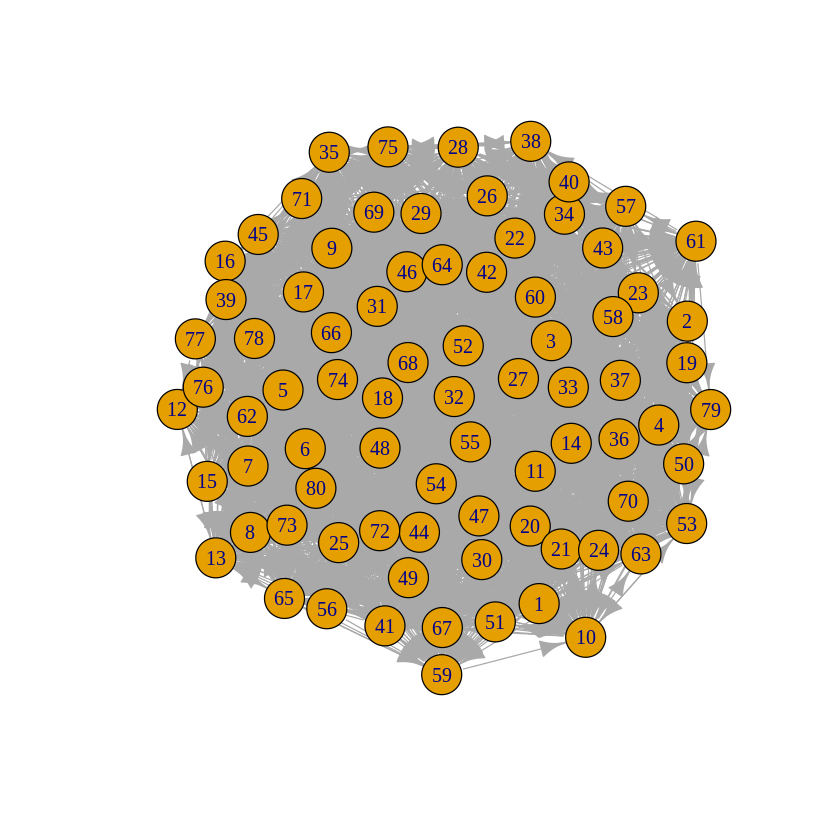

In [10]:
plot(graph)

3. Вычислить «пятичисловую сводку» для графа G𝑑.


In [33]:
adjacency_matrix <- as_adjacency_matrix(graph)
net_random <- as.network(adjacency_matrix, directed = TRUE)
my_matrix <- as.matrix(adjacency_matrix)

<sparse>[ <logic> ]: .M.sub.i.logical() maybe inefficient



* Вычислить размер сети



In [14]:
network.size(net_random)

[1] 80

* Вычислить плотность сети

In [15]:
network.density(net_random)

[1] 0.6188291

* Определить число компонент в сети

In [17]:
count_components(graph)

[1] 1

* Вычислить диаметр сети

In [19]:
diameter(graph)

[1] 2

* Вычислить коэффициент кластеризации.

In [20]:
gtrans(net_random, mode = "graph")

[1] 0.6172419

4. Вычислить цензус диад. Сделать выводы.

In [29]:
dyad.census <- dyad_census(graph)
M <- dyad.census$mut
M

[1] 1221

In [30]:
A <- dyad.census$asym
A

[1] 1469

In [31]:
N <- dyad.census$null
N

[1] 470

Выводы: количество взаимных диад равно 1221, количество ассиметричных диад равно 1469 и количество нулевых диад равно 470.

5. Вычислить оценку индекса взаимности Каца—Пауэла при фиксированом выборе акторов 𝑑 и при свободном выборе. Сделать выводы.


In [32]:
# При фиксированном выборе
# Пусть d = 40
d <- 40
estimate.index.KP <- (2 * (g - 1) * M - g * (d ^ 2) ) / (g * d * (g - 1 - d)) 
estimate.index.KP

[1] 0.5201763

In [35]:
# При свободном выборе
L = sum(rowSums(my_matrix))

count_row <- nrow(my_matrix)
L2.helper <- rep(0, count_row)
for(index in 1:count_row)
  L2.helper[index] <- (rowSums(my_matrix)[index]) ^ 2
L2 <- sum(L2.helper)
estimate.index.KP.free.choice <- (2 * ((g - 1)^2) * M - L^2 + L2) / (L * ( (g-1)^2 ) - L^2 + L2)
estimate.index.KP.free.choice

[1] 0.01473741

Выводы: оценка индекса взаимности Каца—Пауэла при фиксированом выборе акторов ${d}$ = 40 равна 0.52, а при свободном выборе равна 0.01. Оценка при свободном выборе меньше при фиксированом выборе.

6. Вычислить вероятность того, что связь будет взаимной для каждого случая.

In [36]:
fixed.choice.probability <- (d / (g - 1)) * ( ( d / (g - 1) ) + estimate.index.KP * (g - 1 - d) / (g - 1) )
fixed.choice.probability

[1] 0.3863924

In [37]:
get.free.choice.probability <- function(m, g){
  free.choice.probability = 0

  L <- rowSums(m)

  for(index in 1:(count_row - 1)){
    for(j in (index + 1):count_row){
      a <- L[index] * L[j] 
      free.choice.probability  <- a / (( g - 1 )^2) + free.choice.probability 
    }
      
  }
    
  free.choice.probability = 2 * free.choice.probability / ( ( g - 1 ) * g  )
  return(free.choice.probability) 
}
free.choice.probability <- get.free.choice.probability(my_matrix, g)
free.choice.probability

[1] 0.3829157

Вывод: Вероятность того, что связь будет взаимной для фиксированного выбора и для свободного выбора примерно равны 38%.

7. Вычислить индекс взаимности Бандиопадхьяйя. Сделать выводы.


In [61]:
results <- rep(0, g - 2)
second.results = rep(0, g - 3)

f <- function(t, my_matrix, g) {
  L.rowSums <- rowSums(my_matrix)
  return(sum(L.rowSums[1:t]) - t * (g - 1) - ( factorial(t) / ( factorial(2) * factorial(t - 2) ) ))
}

for(i in 2:g){
  results[i-2] <- f(i, my_matrix, g)
}

g_function <- function(t, my_matrix, g) {
  L.rowSums <- rowSums(my_matrix)

  result <- 0
  for(i in (t + 1):g){
    result <- result + min(t, L.rowSums[i])
  }
    
  return(sum(L.rowSums[1:t]) - t * (t - 1) - result)
}

for(i in 2:(g - 1)){
  second.results[i] = g_function(i, my_matrix, g)
}
  

Mmin <- max(results)
Mmax <- floor(1/2 * (L - max(second.results)))

Pb <- (M - Mmin) / (Mmax - Mmin)
Pb


[1] 0.6421258

Выводы: индекс взаимности Бандиопадхьяйя равен 0.64. Это означачает, что количество взаимных диад в графе чуть больше половины от максимального значения.

8. Проверить нулевую гипотезу о том, что число дуг 𝐿 в орграфе
G𝑑 имеет биномиальное распределение 𝐿 ∼ Bin(𝑔(𝑔 − 1), 1/2) при
уровне значимости 𝛼. Определить максимальный уровень значимости при котором нулевая гипотеза не отвергается.


In [67]:
binom.test(L, g * (g-1) , 1/2)


	Exact binomial test

data:  L and g * (g - 1)
number of successes = 3911, number of trials = 6320, p-value < 2.2e-16
alternative hypothesis: true probability of success is not equal to 0.5
95 percent confidence interval:
 0.6067235 0.6308250
sample estimates:
probability of success 
             0.6188291 


p_value < ${α}$ (0.04), значит отклоняем гипотезу. Максимальный уровень значимости при котором нулевая гипотеза не отвергается равен 2.2e-16.

9. Проверить нулевую гипотезу о том, что число дуг 𝐿 в орграфе G𝑑
имеет биномиальное распределение 𝐿 ∼ Bin(𝑔(𝑔−1), 𝑃0) при уровне
значимости 𝛼. Определить максимальный уровень значимости при
котором нулевая гипотеза не отвергается.

In [68]:
binom.test(L, g * (g-1), P.zero)


	Exact binomial test

data:  L and g * (g - 1)
number of successes = 3911, number of trials = 6320, p-value = 0.1523
alternative hypothesis: true probability of success is not equal to 0.61
95 percent confidence interval:
 0.6067235 0.6308250
sample estimates:
probability of success 
             0.6188291 


p_value (0.1523) > ${α}$ (0.04), значит принимаем гипотезу. Максимальный уровень значимости при котором нулевая гипотеза не отвергается равен 0.1523.

10. Построить доверительный интервал для оценки параметра 𝑝 с доверительной надёжностью (1 − 𝛼). Сделать выводы.


In [70]:
Zalpha.first <- 0.5 - (1 - alpha) / 2
p.estimate <- (L) / (g * (g - 1))
Zalpha.first

[1] 0.02

Из таблицы значений функции Лапласа ${Z_{a/2}} = 0.06$

In [71]:
Z.Alpha <- 0.06
p.lower <- p.estimate - Z.Alpha * sqrt(p.estimate * (1 - p.estimate) / (g * (g - 1)))
p.upper <- p.estimate + Z.Alpha * sqrt(p.estimate * (1 - p.estimate) / (g * (g - 1)))
p.lower
p.upper

[1] 0.6184626

[1] 0.6191957

Доверительный интервал: ${0.6184 \leqslant p \leqslant 0.6191}$

## Выводы

Был смоделирован случайный орграф G𝑑 на основе модели Эрдеша—Реньи, вычислил «пятичисловую сводку» для графа, а также цензус диад. Посчитан индекс взаимности Бандиопадхьяйя и оценка индекса взаимности Каца—Пауэла при фиксированом выборе акторов 𝑑 = 40 и при свободном выборе. А также проверили статистический анализ сети.